In [38]:
# credit: lazy programmer

from tensorflow.keras.layers import Input,SimpleRNN, GRU, LSTM, Flatten, GlobalMaxPool1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from mpl_toolkits import mplot3d


In [7]:
# we are building the dataset:
# This is nonlinear and long-distance patterns
# this notebook is to check the long distance and short distance patterns

# lets start with timestep as 10, later we may increase it to see how long NN 
# is able to learn the variations.

T = 10
D = 1       # feature
X = []
Y = []


# below code is written to create the patterns in the data.
# only last 3 items in each timesteps has the pattern, hence short distance
# later for long distance, firt 3 items will create the pattern.

def get_label(x, i1,i2,i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0


for t in range(5000):
    x = np.random.randn(T)
    X.append(x)  
    y = get_label(x, -1,-2,-3)   # pattern at short distance
#     y = get_label(x, 0, 1, 2 )   # pattern at long distance
    
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape, Y.shape)
    

(5000, 10) (5000,)


<AxesSubplot:ylabel='Count'>

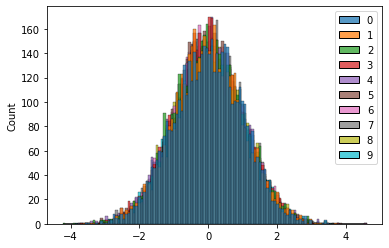

In [25]:
# all data is standard distribution
sns.histplot(X)


<IPython.core.display.Javascript object>


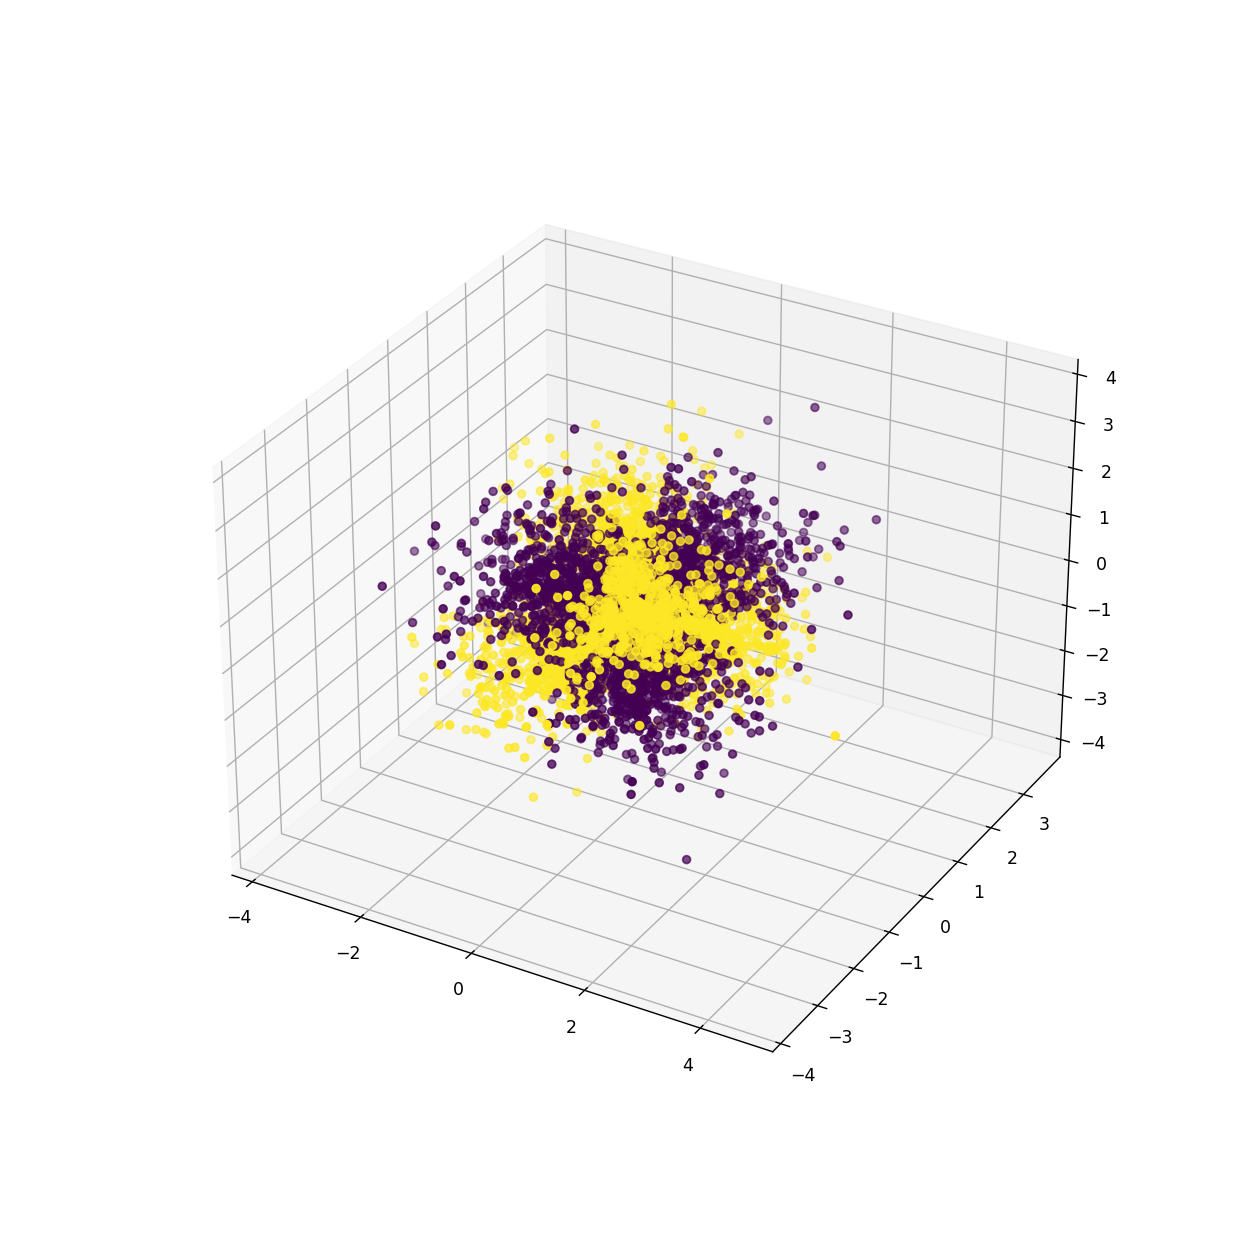

In [36]:
%matplotlib notebook
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')

xline = X[:,-3]
yline = X[:,-2]
zline = X[:,-1]

ax.scatter3D(xline, yline, zline, c = Y)



#### Important point to notice
 - In above scenario, timestep is 10.
 - Patterns are added in the end of the timestep at -1,-2,-3 index positions. so it is comparetively easy to remember from NN point of view.
 - Whereas, if patterns are at starting of timesteps, at 0,1,2 index positions then definitely it will be harder for NN to remember, and it tends to forget things. 
 - Additionaly, if T increases that also give extra burden to NN to remember from more.
 - We will see this nature in upcoming code results.

# Try a linear model first

In [40]:
i = Input(shape = (T,))
x = Dense(1, activation= 'sigmoid')(i)

model = Model(i,x)

model.compile(
            loss = 'binary_crossentropy',
            optimizer = Adam(lr=0.01),
            metrics=['accuracy']
             )

# train

r = model.fit(X,Y, epochs = 100,
             validation_split=0.3
             )

Epoch 1/100
110/110 [==============================] - 2s 5ms/step - loss: 0.8402 - accuracy: 0.5038 - val_loss: 0.6968 - val_accuracy: 0.5053
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4952 - val_loss: 0.6923 - val_accuracy: 0.5087
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5014 - val_loss: 0.6944 - val_accuracy: 0.5160
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5210 - val_loss: 0.6938 - val_accuracy: 0.5080
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5016 - val_loss: 0.6937 - val_accuracy: 0.5273
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5170 - val_loss: 0.6923 - val_accuracy: 0.5020
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4949 - val_loss: 0.6943 - val_accuracy: 0.5240

KeyboardInterrupt: 

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
